**PREDICTING GPD PERCENTAGE GROWTH FOR 2020**

HELLO THERE!!

FIRSTLY LET's: 
- Define GDP and its component
- Tourism and Consumer Spending? <-- 
- Why this topic?


GDP - GROSS DOMESTIC PRODUCT
- Is a measure of economic activity

Components of GDP
 
 INVESTMENT + COSUMPTION + GOVERNMENT PURCHASES + (EXPORTS - IMPORTS)

 FUN FACT:

 CONSUMPTION MAKES UP THE 70% OF A COUNTRY'S GDP

 THUS...

WE INQUIRE INTO THE QUESTION...
**CAN GDP GROWTH BE PREDICTED WITH TOURISM?**

In [66]:
#@title 

import pandas as pd
import requests
import time
import numpy as np
import geopandas as gpd

from bs4 import BeautifulSoup

In [43]:
#@title Data Collection

url = "https://countryeconomy.com/gdp?year=2017"

response = requests.get(url)

req = requests.get(url)

soup = BeautifulSoup(response.text,"html.parser")

table = soup.find("table", attrs = {"class": "table tabledat table-striped table-condensed table-hover","id":"tbA"})

table_data= table.find("tbody")

#table_data

#@title

country_names=[]
year= []
annual_gdp=[]
gdp_growth=[]

for row in table_data.find_all("tr")[0:]:
  value =row.find_all("td")
  country = value[0].find("a")
  country_names.append(value[0].find("a").text.replace(" [+]","").strip())
  year.append(value[1].text.replace(",","").strip())
  annual_gdp.append(value[4].text.replace(",","").strip())
  gdp_growth.append(value[6].text.replace(",","").strip())
#country_names
#population.append(int(value[2].text.replace(",","").strip()))
#@title
# print(year)
# print(country_names)
# print(annual_gdp)
# print(gdp_growth)
#@title
WOrld_gdp = pd.DataFrame({"Country Name":country_names,"Annual GDP 2017":annual_gdp,"GDP Growth 2017":gdp_growth})

# WOrld_gdp
#@title
url = "https://countryeconomy.com/gdp?year=2018"

response = requests.get(url)

req = requests.get(url)

soup = BeautifulSoup(response.text,"html.parser")

table = soup.find("table", attrs = {"class": "table tabledat table-striped table-condensed table-hover","id":"tbA"})

table_data= table.find("tbody")
#@title
country_names=[]
year= []
annual_gdp=[]
gdp_growth=[]

for row in table_data.find_all("tr")[0:]:
  value =row.find_all("td")
  country = value[0].find("a")
  country_names.append(value[0].find("a").text.replace(" [+]","").strip())
  year.append(value[1].text.replace(",","").strip())
  annual_gdp.append(value[4].text.replace(",","").strip())
  gdp_growth.append(value[6].text.replace(",","").strip())
#@title
Wrld_gdp = pd.DataFrame({"Country Name":country_names,"Annual GDP 2018":annual_gdp,"GDP Growth 2018":gdp_growth})

# Wrld_gdp
#@title
df_join = WOrld_gdp.merge(Wrld_gdp, on=["Country Name"], how= "inner")

#df_join
#@title
url = "https://countryeconomy.com/gdp?year=2019"

response = requests.get(url)

req = requests.get(url)

soup = BeautifulSoup(response.text,"html.parser")

table = soup.find("table", attrs = {"class": "table tabledat table-striped table-condensed table-hover","id":"tbA"})

table_data= table.find("tbody")
#@title
country_names=[]
year= []
annual_gdp=[]
gdp_growth=[]

for row in table_data.find_all("tr")[0:]:
  value =row.find_all("td")
  country = value[0].find("a")
  country_names.append(value[0].find("a").text.replace(" [+]","").strip())
  year.append(value[1].text.replace(",","").strip())
  annual_gdp.append(value[4].text.replace(",","").strip())
  gdp_growth.append(value[6].text.replace(",","").strip())
#@title
W0rld_gdp = pd.DataFrame({"Country Name":country_names,"Annual GDP 2019":annual_gdp,"GDP Growth 2019":gdp_growth})

#W0rld_gdp
#@title
World_gdp = df_join.merge(W0rld_gdp, on=["Country Name"], how= "inner")

#World_gdp
#@title
df_expenditure = pd.read_csv("Expenditure.csv")

df_expenditure.set_index("Country Name")

df_exp = pd.DataFrame({"Country Name": df_expenditure["Country Name"],
              "Series Name" : df_expenditure["Series Name"],
              "Tourism Expenditure 2017" : df_expenditure["2017"],
              "Tourism Expenditure 2018" : df_expenditure["2018"],
              "Tourism Expenditure 2019" : df_expenditure["2019"] })

new_exp = df_exp.iloc[0:217,:]
#@title
df_tourism = pd.read_csv("Consumer_spending.csv")

df_tourism.sort_values("Country Name")

df_con = pd.DataFrame({"Country Name": df_tourism["Country Name"],
              "Indicator Name" : df_tourism["Indicator Name"],
              "Consumer Spending 2017" : df_tourism["2017"],
              "Consumer Spending 2018" : df_tourism["2018"],
              "Consumer Spending 2019" : df_tourism["2019"] })#.set_index("Country Name")

#@title
df_consumption = new_exp.merge(df_con, on=["Country Name"], how = "outer")
#@title
df_world = World_gdp.merge(df_consumption, on =["Country Name"], how = "inner")

df_world = df_world.replace("","0").replace("..","0").dropna()

df_world

,Country Name,Annual GDP 2017,GDP Growth 2017,Annual GDP 2018,GDP Growth 2018,Annual GDP 2019,GDP Growth 2019,Series Name,Tourism Expenditure 2017,Tourism Expenditure 2018,Tourism Expenditure 2019,Indicator Name,Consumer Spending 2017,Consumer Spending 2018,Consumer Spending 2019
0,United States,$19477300M,2.2%,$20533100M,2.9%,$21381000M,2.3%,"International tourism, expenditures (current US$)",1.58287E+11,1.76818E+11,1.86079E+11,Final consumption expenditure (current US$),1.600000e+13,1.680000e+13,1.740000e+13
1,United Kingdom,$2701268M,1.7%,$2904513M,1.3%,$2880357M,1.4%,"International tourism, expenditures (current US$)",0,0,0,Final consumption expenditure (current US$),2.230000e+12,2.400000e+12,2.380000e+12
2,Germany,$3689547M,2.7%,$3976246M,1.0%,$3888655M,0.6%,"International tourism, expenditures (current US$)",97163000000,1.03502E+11,1.01231E+11,Final consumption expenditure (current US$),2.660000e+12,2.860000e+12,2.810000e+12
3,France,$2594235M,2.3%,$2792223M,1.9%,$2729171M,1.8%,"International tourism, expenditures (current US$)",53787000000,59131000000,59751000000,Final consumption expenditure (current US$),2.010000e+12,2.150000e+12,2.090000e+12
4,Japan,$4930837M,1.7%,$5040885M,0.6%,$5120310M,-0.4%,"International tourism, expenditures (current US$)",25774000000,28097000000,29146000000,Final consumption expenditure (current US$),3.650000e+12,3.750000e+12,3.820000e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Vanuatu,$880M,6.3%,$929M,2.9%,$930M,3.2%,"International tourism, expenditures (current US$)",19000000,21000000,32000000,Final consumption expenditure (current US$),6.984738e+08,6.940408e+08,7.126577e+08
169,Samoa,$885M,1.4%,$878M,-0.6%,$913M,4.5%,"International tourism, expenditures (current US$)",3900000.095,4099999.905,5199999.809,Final consumption expenditure (current US$),7.205378e+08,7.115352e+08,7.373096e+08
170,South Africa,$381317M,1.4%,$403991M,0.8%,$388446M,0.2%,"International tourism, expenditures (current US$)",6068000000,6348000000,5866000000,Final consumption expenditure (current US$),3.140000e+11,3.370000e+11,3.250000e+11
171,Zambia,$25874M,4.1%,$26312M,3.5%,$23309M,1.4%,"International tourism, expenditures (current US$)",410000000,478000000,511000000,Final consumption expenditure (current US$),1.570581e+10,1.517567e+10,1.396964e+10


In [44]:
#@title DATA CLEANING
# Turning annual GPD into ints for mathematical manipulation 

one_million = 1e6

df_world["Annual GDP 2017"] = df_world["Annual GDP 2017"].str.replace("$","").str[:-1].astype("int") * one_million
df_world["Annual GDP 2018"] = df_world["Annual GDP 2018"].str.replace("$","").str[:-1].astype("int") * one_million
df_world["Annual GDP 2019"] = df_world["Annual GDP 2019"].str.replace("$","").str[:-1].astype("int") * one_million

# Turning percent growth into floats for mathematical manipulation 

df_world["GDP Growth 2017"] = df_world["GDP Growth 2017"].str.replace("%","").astype("float")
df_world["GDP Growth 2018"] = df_world["GDP Growth 2018"].str.replace("%","").astype("float")
df_world["GDP Growth 2019"] = df_world["GDP Growth 2019"].str.replace("%","").astype("float")

# Turning tourism expenditure into floats for mathematical manipulation
df_world["Tourism Expenditure 2017"] = df_world["Tourism Expenditure 2017"].astype("float")
df_world["Tourism Expenditure 2018"] = df_world["Tourism Expenditure 2018"].astype("float")
df_world["Tourism Expenditure 2019"] = df_world["Tourism Expenditure 2019"].astype("float")

#df_world

<ipython-input-44-4a6d0d3d0d14>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_world["Annual GDP 2017"] = df_world["Annual GDP 2017"].str.replace("$","").str[:-1].astype("int") * one_million
<ipython-input-44-4a6d0d3d0d14>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_world["Annual GDP 2018"] = df_world["Annual GDP 2018"].str.replace("$","").str[:-1].astype("int") * one_million
<ipython-input-44-4a6d0d3d0d14>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_world["Annual GDP 2019"] = df_world["Annual GDP 20

In [61]:
#@title Data Exploration + Adding new columns
## Calculating percent growth of tourism expenses (TE)
# Between year 2017-2018
difference = df_world["Tourism Expenditure 2017"] - df_world["Tourism Expenditure 2018"]

df_world["% TE Growth 17-18"] = difference/df_world["Tourism Expenditure 2018"] * 100

# Between year 2018-2019

dfference = df_world["Tourism Expenditure 2018"] - df_world["Tourism Expenditure 2019"]

df_world["% TE Growth 18-19"] = dfference/df_world["Tourism Expenditure 2019"] * 100

df_world["Overall TE Growth"]= df_world["% TE Growth 18-19"] - df_world["% TE Growth 17-18"]
## Calculating percent growth of consumer spending (CS)

# Between year 2017-2018

dference = df_world["Consumer Spending 2018"] - df_world["Consumer Spending 2017"]

df_world["% CS Growth 17-18"] = dference/df_world["Consumer Spending 2017"] * 100

# Between year 2018-2019

d1ference = df_world["Consumer Spending 2019"] - df_world["Consumer Spending 2018"]

df_world["% CS Growth 18-19"] = d1ference/df_world["Consumer Spending 2018"] * 100

df_world["Overall CS Growth"]= df_world["% CS Growth 18-19"] - df_world["% CS Growth 17-18"]

## Calculating proportion of Tourism Expenses (TE) to Consumer Spending (CS)
# Part/ Whole
df_world["Proportion TE/CS"] = df_world["Overall TE Growth"]/ df_world["Overall CS Growth"]

## Calculating average growth of annual GDP
df_world["Average Growth GDP"] = (df_world["GDP Growth 2017"]+df_world["GDP Growth 2018"] + df_world["GDP Growth 2017"])/3

#new_df_w = df_world.fillna(0).replace(np.inf,np.nan).dropna()
new_df_w = df_world.replace(np.inf,np.nan).dropna()
new_df_w

,Country Name,Annual GDP 2017,GDP Growth 2017,Annual GDP 2018,GDP Growth 2018,Annual GDP 2019,GDP Growth 2019,Series Name,Tourism Expenditure 2017,Tourism Expenditure 2018,...,Consumer Spending 2018,Consumer Spending 2019,% TE Growth 17-18,% TE Growth 18-19,Overall TE Growth,% CS Growth 17-18,% CS Growth 18-19,Overall CS Growth,Proportion TE/CS,Average Growth GDP
0,United States,1.947730e+13,2.2,2.053310e+13,2.9,2.138100e+13,2.3,"International tourism, expenditures (current US$)",1.582870e+11,1.768180e+11,...,1.680000e+13,1.740000e+13,-10.480268,-4.976918,5.503349,5.000000,3.571429,-1.428571,-3.852345,2.433333
2,Germany,3.689547e+12,2.7,3.976246e+12,1.0,3.888655e+12,0.6,"International tourism, expenditures (current US$)",9.716300e+10,1.035020e+11,...,2.860000e+12,2.810000e+12,-6.124519,2.243384,8.367903,7.518797,-1.748252,-9.267049,-0.902974,2.133333
3,France,2.594235e+12,2.3,2.792223e+12,1.9,2.729171e+12,1.8,"International tourism, expenditures (current US$)",5.378700e+10,5.913100e+10,...,2.150000e+12,2.090000e+12,-9.037561,-1.037640,7.999921,6.965174,-2.790698,-9.755872,-0.820011,2.166667
4,Japan,4.930837e+12,1.7,5.040885e+12,0.6,5.120310e+12,-0.4,"International tourism, expenditures (current US$)",2.577400e+10,2.809700e+10,...,3.750000e+12,3.820000e+12,-8.267787,-3.599122,4.668665,2.739726,1.866667,-0.873059,-5.347477,1.333333
6,Italy,1.961104e+12,1.7,2.092881e+12,0.9,2.011507e+12,0.5,"International tourism, expenditures (current US$)",3.481900e+10,3.764400e+10,...,1.650000e+12,1.580000e+12,-7.504516,-0.696423,6.808093,6.451613,-4.242424,-10.694037,-0.636625,1.433333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Vanuatu,8.800000e+08,6.3,9.290000e+08,2.9,9.300000e+08,3.2,"International tourism, expenditures (current US$)",1.900000e+07,2.100000e+07,...,6.940408e+08,7.126577e+08,-9.523810,-34.375000,-24.851190,-0.634670,2.682400,3.317070,-7.491910,5.166667
169,Samoa,8.850000e+08,1.4,8.780000e+08,-0.6,9.130000e+08,4.5,"International tourism, expenditures (current US$)",3.900000e+06,4.100000e+06,...,7.115352e+08,7.373096e+08,-4.878044,-21.153845,-16.275801,-1.249422,3.622353,4.871775,-3.340836,0.733333
170,South Africa,3.813170e+11,1.4,4.039910e+11,0.8,3.884460e+11,0.2,"International tourism, expenditures (current US$)",6.068000e+09,6.348000e+09,...,3.370000e+11,3.250000e+11,-4.410838,8.216843,12.627681,7.324841,-3.560831,-10.885672,-1.160028,1.200000
171,Zambia,2.587400e+10,4.1,2.631200e+10,3.5,2.330900e+10,1.4,"International tourism, expenditures (current US$)",4.100000e+08,4.780000e+08,...,1.517567e+10,1.396964e+10,-14.225941,-6.457926,7.768016,-3.375414,-7.947153,-4.571739,-1.699138,3.900000


<Axes: xlabel='Country Name'>

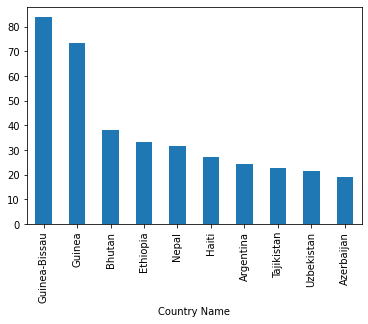

In [59]:
#@title 10 countries with highest increase in Tourist Expenditure %
# Top 10 countries with highest increase in Tourist Expenditure %

new_df_w.sort_values("Overall TE Growth", ascending = False ).replace(np.inf,np.nan).dropna().set_index("Country Name").iloc[:10,16].plot.bar()
                                           

<Axes: xlabel='Country Name'>

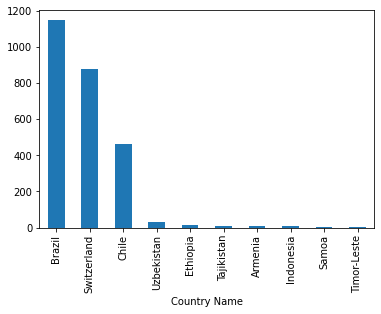

In [56]:
#@title Top 10 countries with highest increase in Consumer Expenditure %
# Top 10 countries with highest increase in Consumer Expenditure %
## Theres more consumption, this might have something to do with the countries respective population

new_df_w.sort_values("Overall CS Growth", ascending = False ).replace(np.inf,np.nan).dropna().set_index("Country Name").iloc[:10,19].plot.bar() 

<Axes: xlabel='Country Name'>

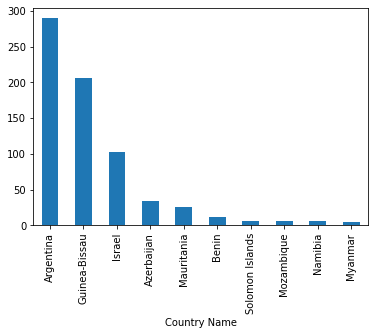

In [57]:
#@title Countries whose GDP is heavily influenced by Tourist Expenditure
                                           
### Plot bar of higher proportion
## Top 10 of countries whose GDP is heavily influenced by Tourist Expenditure in local goods.

new_df_w.sort_values("Proportion TE/CS", ascending = False ).replace(np.inf,np.nan).dropna().set_index("Country Name").iloc[:10,20].plot.bar()  


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


-0.09510052417211134


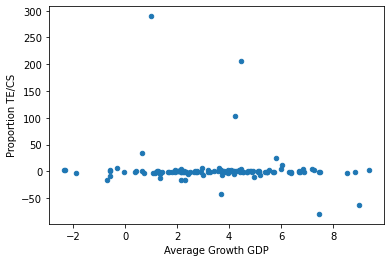

In [52]:
#@title SCATTERPLOT -- Potential correlation?
new_df_w.plot.scatter(x="Average Growth GDP", y="Proportion TE/CS")
R = new_df_w["Average Growth GDP"].corr(new_df_w["Proportion TE/CS"])
print(R)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


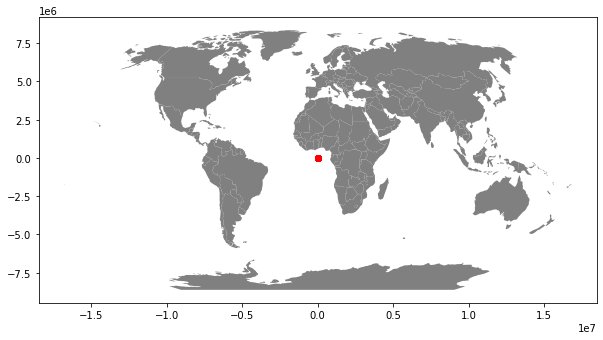

In [58]:
#@title FAILED ATTEMPT TO CHLOROPLETH
### Attempting to create a chloropleth representing country with higher proportion
!pip install geopandas

gpd_earth = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
ax = gpd_earth.to_crs("ESRI:53030").plot(facecolor = "gray", figsize = (10,10))

gdf_countries = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")

gdf_countries = gdf_countries[["Country/Region","Lat","Long"]]

gdf_countries = pd.DataFrame({"Country Name": gdf_countries["Country/Region"],
              "Latitude": gdf_countries["Lat"],
              "Longitude" : gdf_countries["Long"]})

lol= new_df_w.merge(gdf_countries, on =["Country Name"], how = "left")

gdf_gdp = gpd.GeoDataFrame(lol["Proportion TE/CS"], geometry = gpd.points_from_xy(lol["Longitude"],lol["Latitude"])).set_crs(gpd_earth.crs)

ax = gdf_gdp.plot(ax=ax, color= "red", alpha=0.2,legend=True,figsize=(12, 12))

PREDICTING AVERAGING GDP GROWTH WITH PROPORTION

<Axes: >

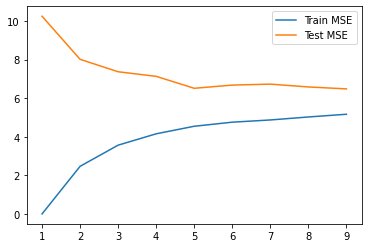

In [ ]:
#@title FINDING K
## Determining the right value of K for KRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

results = []

X_train= new_df_w[["Proportion TE/CS"]]
y_train= new_df_w["Average Growth GDP"]

col_transformer = make_column_transformer((StandardScaler(), ["Proportion TE/CS"]))

kvals = range(1,10)
for k in kvals:
  pipeline = make_pipeline(
      col_transformer,
      KNeighborsRegressor(n_neighbors=k,metric="euclidean")
  )
  pipeline.fit(X_train,y_train)
  y_preds = pipeline.predict(X_train)

  results.append(mean_squared_error(y_preds,y_train))

grid_k = GridSearchCV(
    pipeline,
    param_grid={"kneighborsregressor__n_neighbors": range(1,10)    
    },
    scoring = "neg_mean_squared_error",
    cv = 10,
    return_train_score=True)

grid_k.fit(X_train,y_train)

pd.DataFrame({"Train MSE":pd.Series(-grid_k.cv_results_['mean_train_score'], index = kvals),"Test MSE":pd.Series(-grid_k.cv_results_['mean_test_score'], index = kvals)}).plot.line(legend=True)

BEST K seems to be 9, k=1 is overfitted

In [49]:
#@title FINDING BEST FITTING METRIC
scalers = ["euclidean", "manhattan"]

for scale in scalers:
  col_transformer = make_column_transformer((StandardScaler(), ["Proportion TE/CS"]), remainder = 'drop')
  pipeline = make_pipeline(col_transformer, KNeighborsRegressor(n_neighbors = 9, metric = scale))

  scores = cross_val_score(pipeline, X = X_train, y = y_train, scoring = "neg_mean_squared_error", cv = 10)
  
  print(-scores.mean())


6.481115771517006
6.481115771517006


Both Euclidean and Manhattan seemed to be good fitting metrics

In [50]:
#@title Predicting average growth in GDP using a 7-nearest neighbors model using proportion (KNR)
# Predicting average growth in GDP using a 7-nearest neighbors model using proportion

pipeline = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor(
    n_neighbors = 9,
     metric = "euclidean"))

pipeline.fit(X=X_train, y=y_train)
y_train_=pipeline.predict(X_train)

scores = cross_val_score(
    pipeline, X = X_train,
     y = y_train,
      scoring = "neg_mean_squared_error",
      cv = 10)

print(-scores.mean())

6.481115771517006


In [63]:
#@title Predicting average growth in GDP using a 7-nearest neighbors model using proportion (LR)

pipeline = make_pipeline(
    StandardScaler(),
    LinearRegression())

pipeline.fit(X=X_train, y=y_train)
y_train_1=pipeline.predict(X_train)

scores = cross_val_score(
    pipeline, X = X_train,
     y = y_train,
      scoring = "neg_mean_squared_error",
      cv = 10)

print(-scores.mean())

5.719547792027724


In [65]:
#@title Adding predicted average growth in GDP to Data Frame

new_df_w["Predictions"] = y_train_1

new_df_w

,Country Name,Annual GDP 2017,GDP Growth 2017,Annual GDP 2018,GDP Growth 2018,Annual GDP 2019,GDP Growth 2019,Series Name,Tourism Expenditure 2017,Tourism Expenditure 2018,...,Consumer Spending 2019,% TE Growth 17-18,% TE Growth 18-19,Overall TE Growth,% CS Growth 17-18,% CS Growth 18-19,Overall CS Growth,Proportion TE/CS,Average Growth GDP,Predictions
0,United States,1.947730e+13,2.2,2.053310e+13,2.9,2.138100e+13,2.3,"International tourism, expenditures (current US$)",1.582870e+11,1.768180e+11,...,1.740000e+13,-10.480268,-4.976918,5.503349,5.000000,3.571429,-1.428571,-3.852345,2.433333,3.596517
2,Germany,3.689547e+12,2.7,3.976246e+12,1.0,3.888655e+12,0.6,"International tourism, expenditures (current US$)",9.716300e+10,1.035020e+11,...,2.810000e+12,-6.124519,2.243384,8.367903,7.518797,-1.748252,-9.267049,-0.902974,2.133333,3.577640
3,France,2.594235e+12,2.3,2.792223e+12,1.9,2.729171e+12,1.8,"International tourism, expenditures (current US$)",5.378700e+10,5.913100e+10,...,2.090000e+12,-9.037561,-1.037640,7.999921,6.965174,-2.790698,-9.755872,-0.820011,2.166667,3.577109
4,Japan,4.930837e+12,1.7,5.040885e+12,0.6,5.120310e+12,-0.4,"International tourism, expenditures (current US$)",2.577400e+10,2.809700e+10,...,3.820000e+12,-8.267787,-3.599122,4.668665,2.739726,1.866667,-0.873059,-5.347477,1.333333,3.606087
6,Italy,1.961104e+12,1.7,2.092881e+12,0.9,2.011507e+12,0.5,"International tourism, expenditures (current US$)",3.481900e+10,3.764400e+10,...,1.580000e+12,-7.504516,-0.696423,6.808093,6.451613,-4.242424,-10.694037,-0.636625,1.433333,3.575935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Vanuatu,8.800000e+08,6.3,9.290000e+08,2.9,9.300000e+08,3.2,"International tourism, expenditures (current US$)",1.900000e+07,2.100000e+07,...,7.126577e+08,-9.523810,-34.375000,-24.851190,-0.634670,2.682400,3.317070,-7.491910,5.166667,3.619812
169,Samoa,8.850000e+08,1.4,8.780000e+08,-0.6,9.130000e+08,4.5,"International tourism, expenditures (current US$)",3.900000e+06,4.100000e+06,...,7.373096e+08,-4.878044,-21.153845,-16.275801,-1.249422,3.622353,4.871775,-3.340836,0.733333,3.593243
170,South Africa,3.813170e+11,1.4,4.039910e+11,0.8,3.884460e+11,0.2,"International tourism, expenditures (current US$)",6.068000e+09,6.348000e+09,...,3.250000e+11,-4.410838,8.216843,12.627681,7.324841,-3.560831,-10.885672,-1.160028,1.200000,3.579285
171,Zambia,2.587400e+10,4.1,2.631200e+10,3.5,2.330900e+10,1.4,"International tourism, expenditures (current US$)",4.100000e+08,4.780000e+08,...,1.396964e+10,-14.225941,-6.457926,7.768016,-3.375414,-7.947153,-4.571739,-1.699138,3.900000,3.582736


In [69]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files

Mounted at /content/drive
